In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pylab import mpl

In [2]:
chinese_font = font_manager.FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc')
english_font = font_manager.FontProperties(fname = 'C:\\Windows\\Fonts\\times.ttf')

In [3]:
policy_reduction = pd.read_csv('policy_reduction.csv', index_col = 0)
pattern_reduction = pd.read_csv('pattern_reduction.csv', index_col = 0)
policy_carbon = pd.read_csv('policy_carbon.csv', index_col = 0)
dpnf = pd.read_csv('DPNF.csv', index_col = 0)
srnf = pd.read_csv('SRNF.csv', index_col = 0)
production = pd.read_csv('production.csv', index_col = 0)

In [4]:
policy_scenarios = ['BASE', 'C_2', 'C_3', 'C_4', 'D_20%', 'D_30%', 'D_40%', 'S_40%', 'S_50%', 'S_60%']
pattern_scenarios = ['BASE', 'DX', 'DY', 'DM']
xticks = range(2020, 2026)

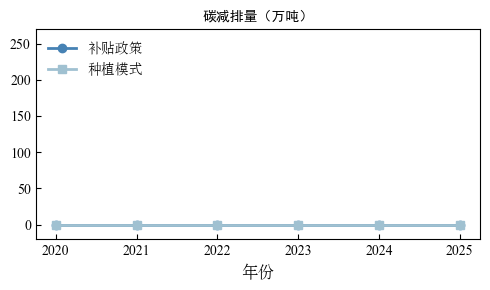

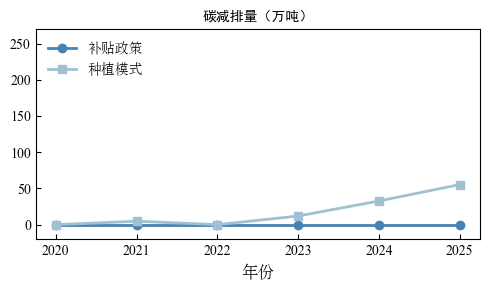

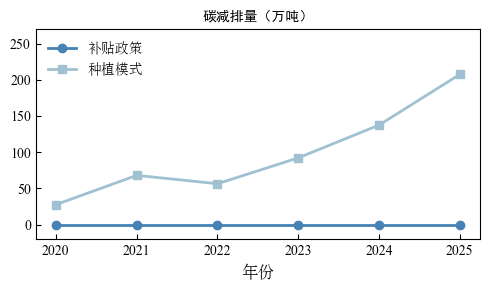

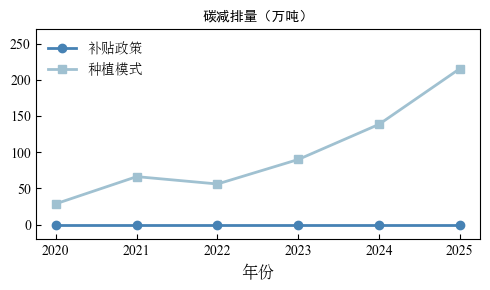

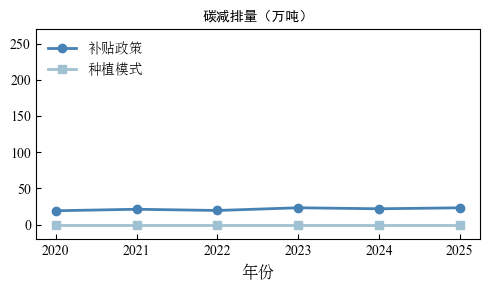

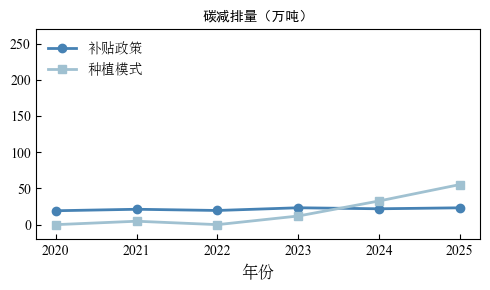

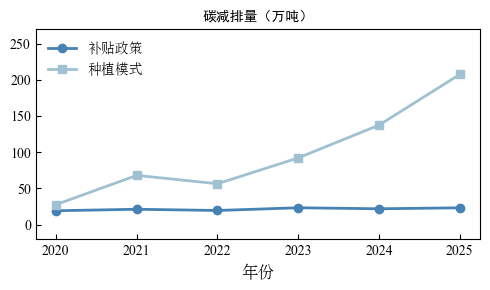

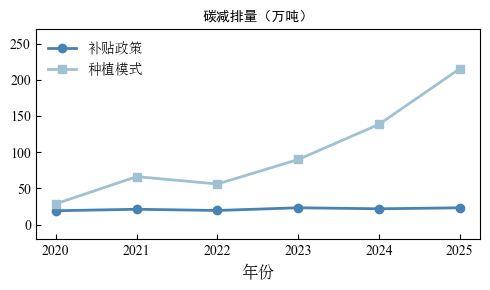

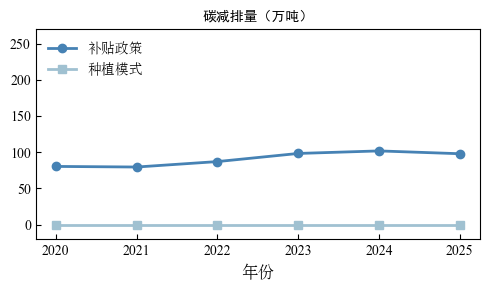

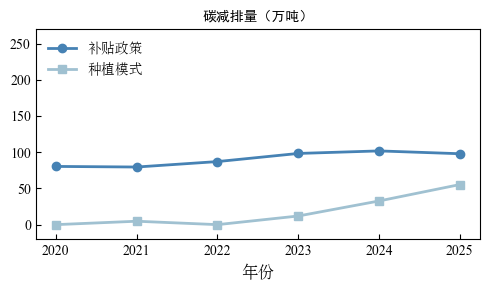

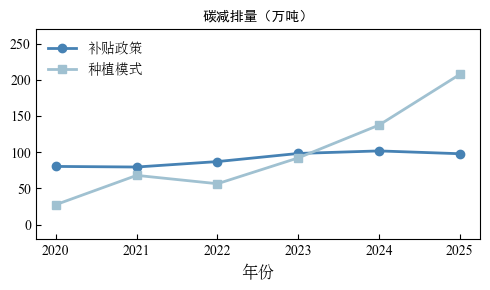

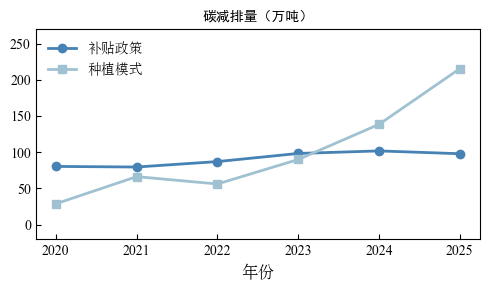

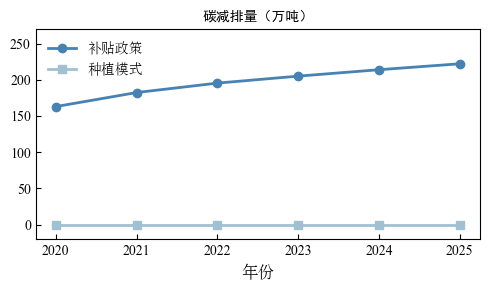

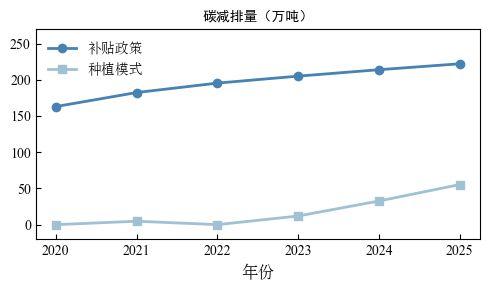

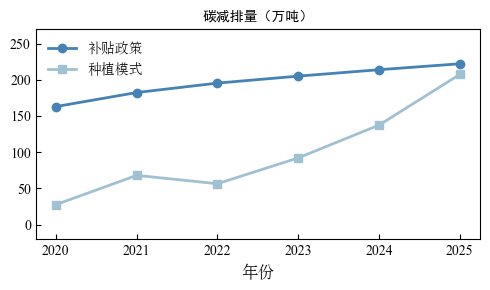

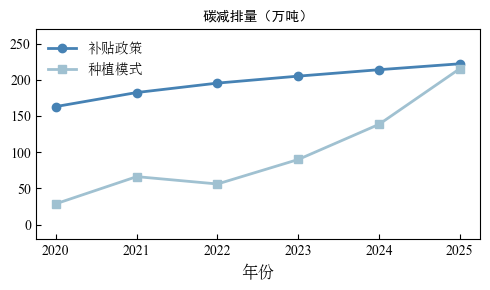

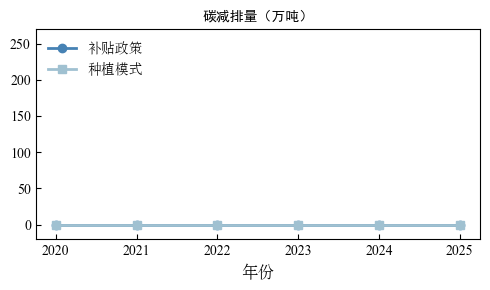

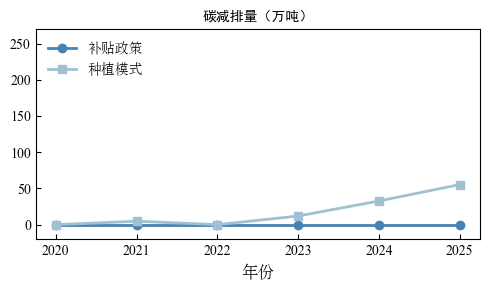

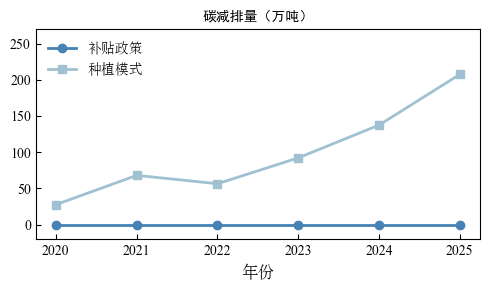

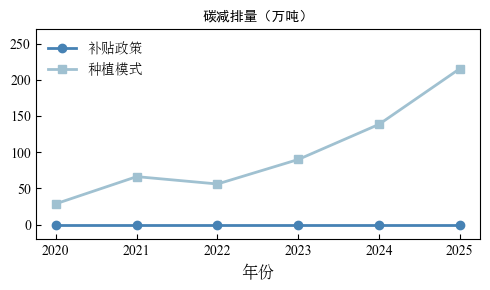

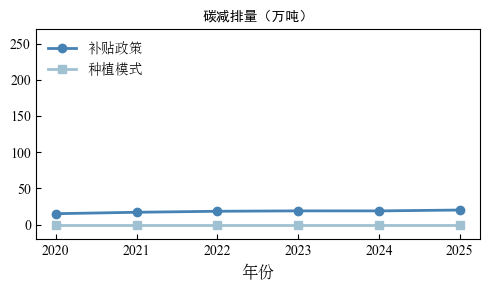

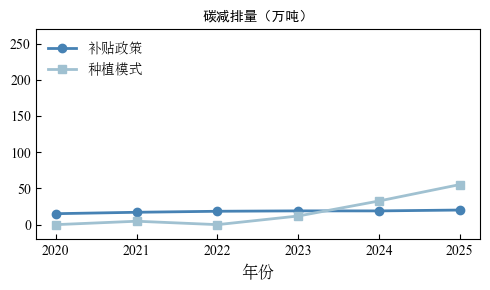

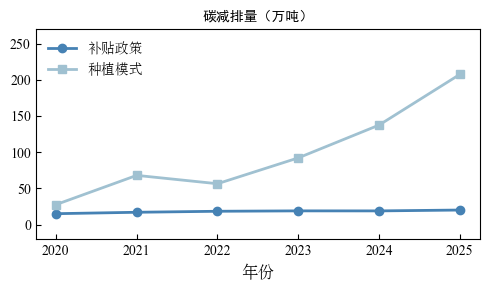

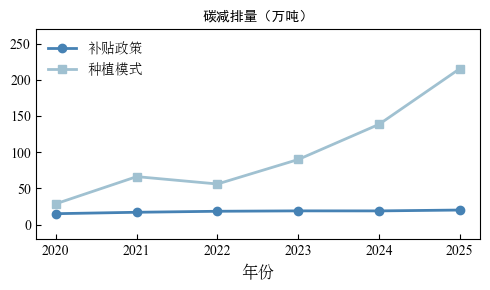

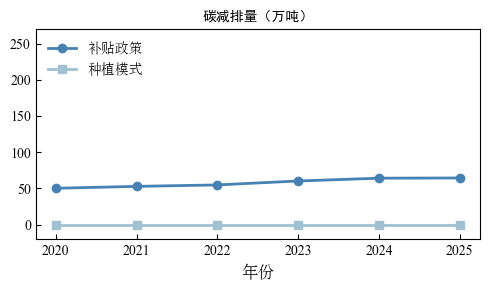

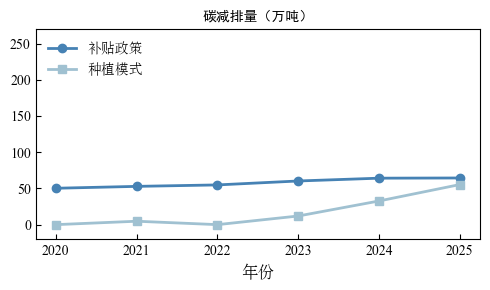

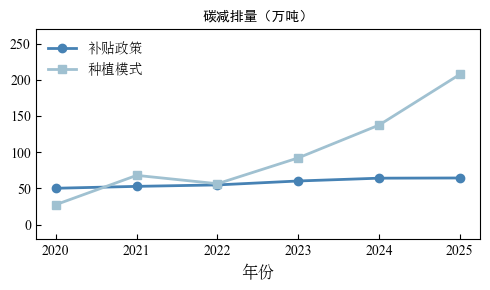

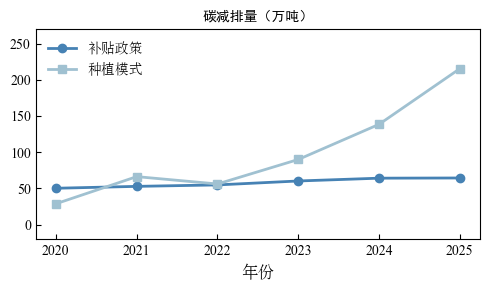

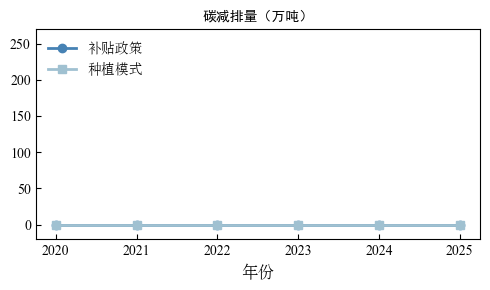

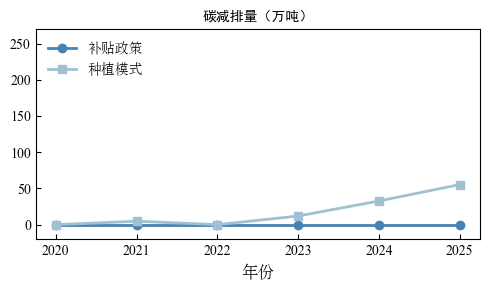

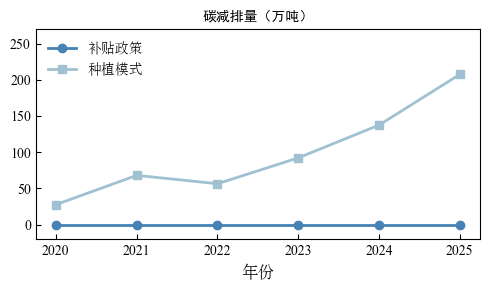

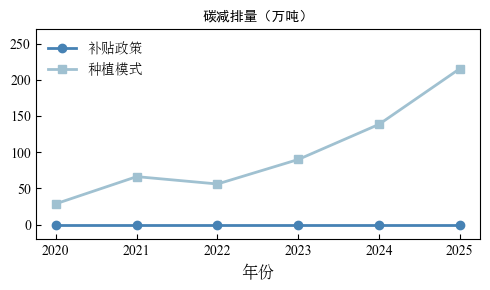

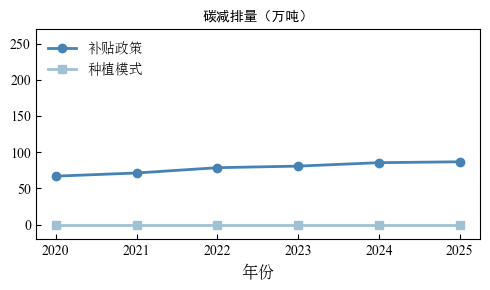

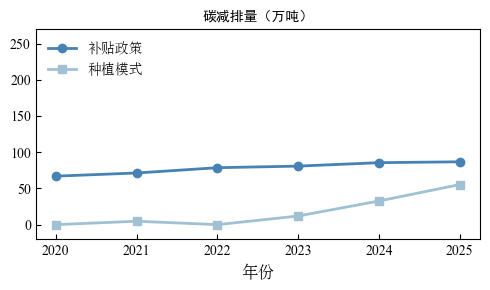

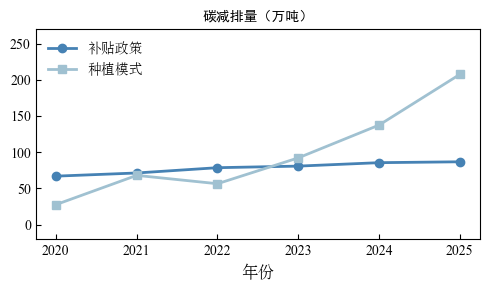

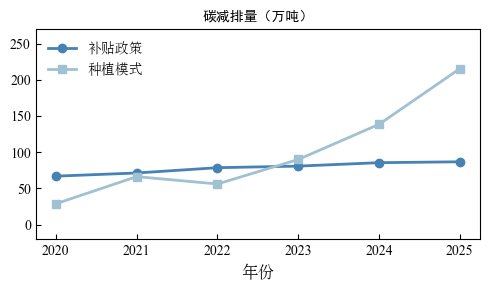

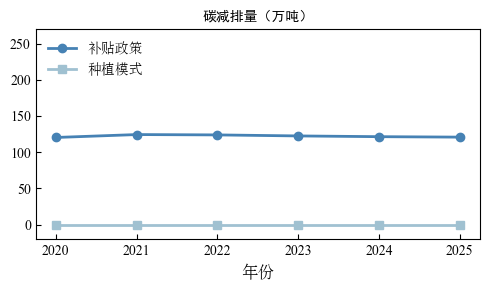

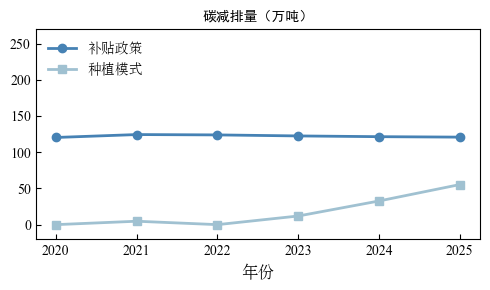

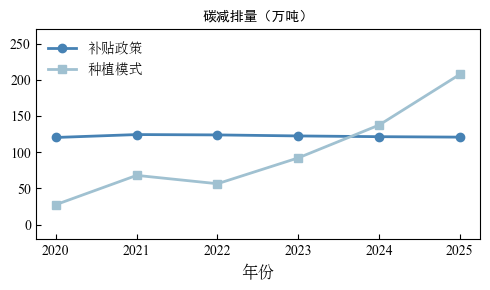

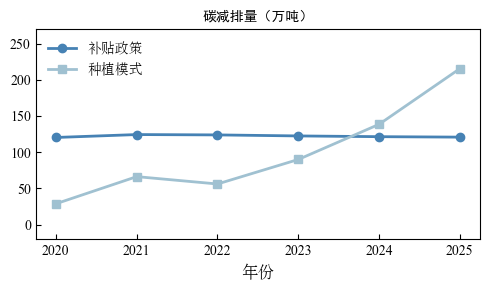

In [5]:
policy_scenarios = ['BASE', 'C_2', 'C_3', 'C_4', 'D_20%', 'D_30%', 'D_40%', 'S_40%', 'S_50%', 'S_60%']
pattern_scenarios = ['BASE', 'DX', 'DY', 'DM']
for scenario in policy_scenarios:
    for pattern in pattern_scenarios:
        plt.figure(figsize = (5, 3))
        plt.plot(xticks, policy_reduction[scenario], linewidth = 2, color = '#4682B4', marker = 'o', label = '补贴政策')
        plt.plot(xticks, pattern_reduction[pattern], linewidth = 2, color = '#A0C1D1', marker = 's', label = '种植模式')
        plt.xlabel('年份', fontsize = 12, fontproperties = chinese_font)
        # plt.ylabel('碳减排量（万吨）', fontsize = 12, fontproperties = chinese_font)
        plt.xticks(xticks, fontproperties = english_font)
        plt.yticks(fontproperties = english_font)
        plt.ylim(-20, 270)
        plt.title('碳减排量（万吨）', fontsize = 14, fontproperties = 'SimHei')
        plt.legend(loc = 'upper left', fontsize = 12, prop={'family': 'SimSun'}, frameon = False)
        plt.gca().tick_params(axis = 'x', direction = 'in')
        plt.gca().tick_params(axis = 'y', direction = 'in')
        plt.tight_layout()
        plt.savefig(f'./images/reduction_{pattern}_{scenario}.png', dpi = 500, transparent = True)
        plt.show()

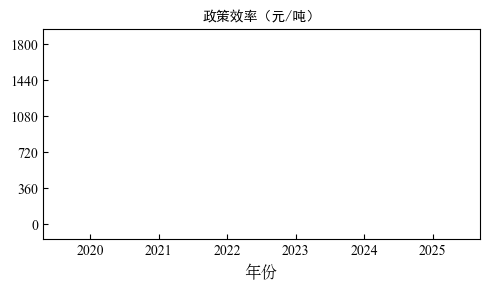

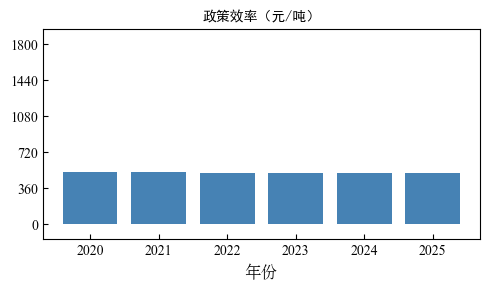

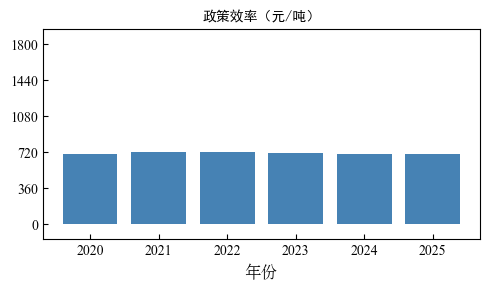

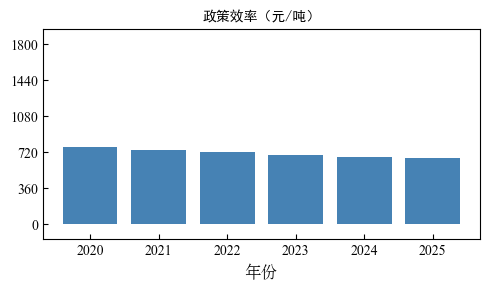

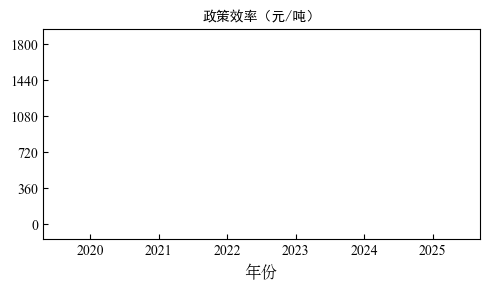

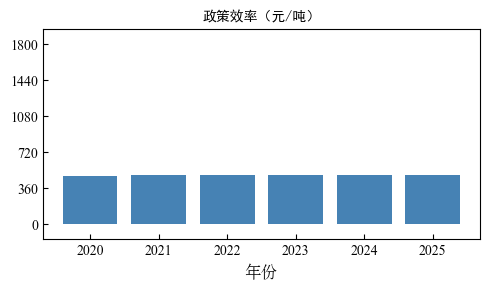

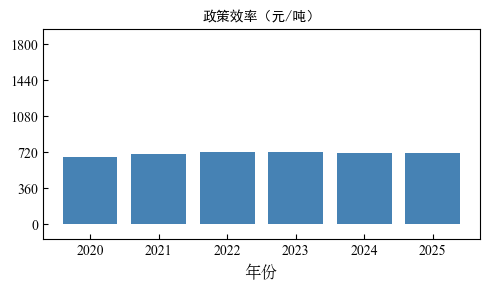

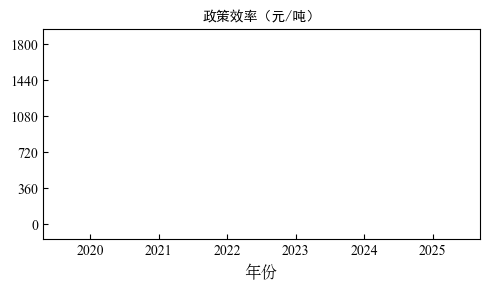

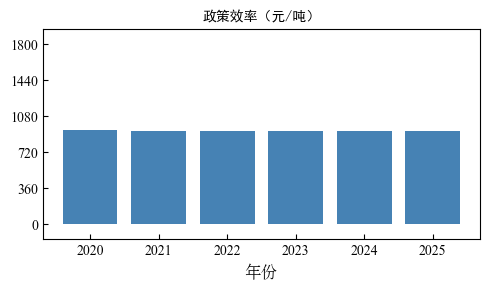

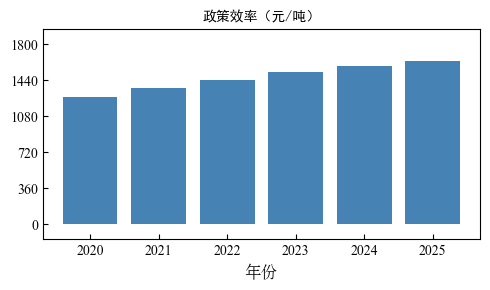

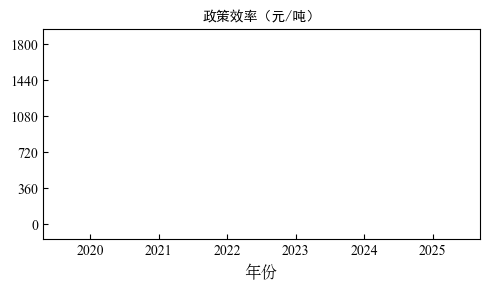

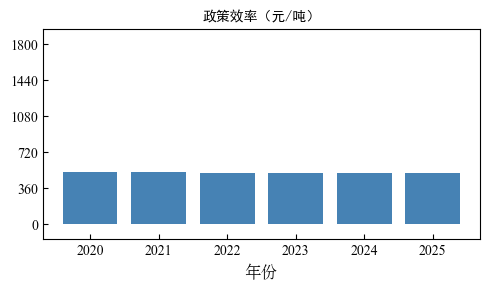

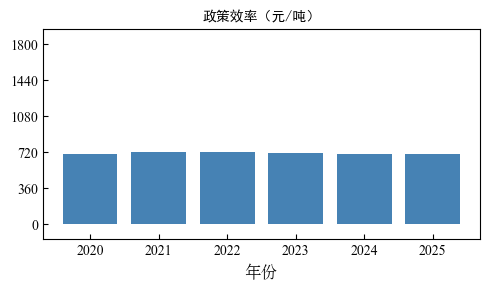

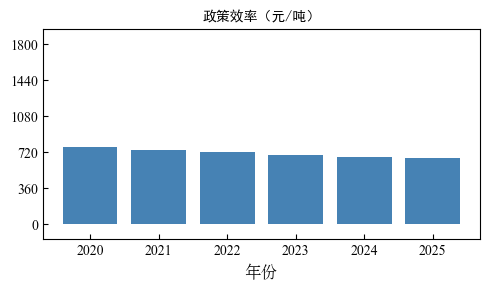

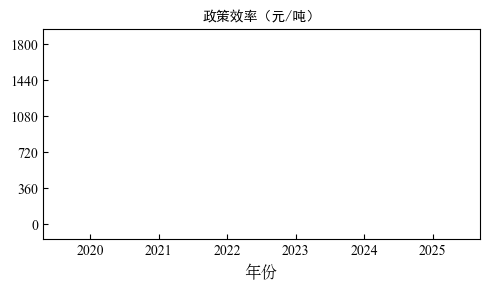

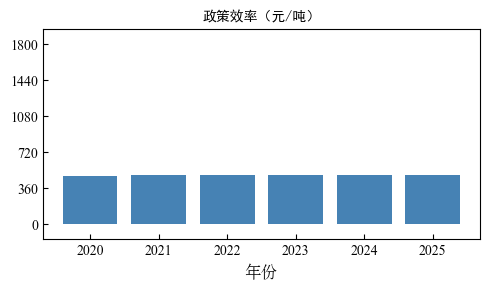

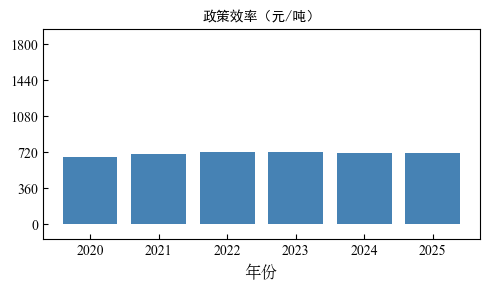

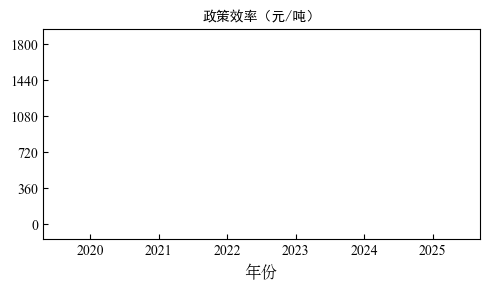

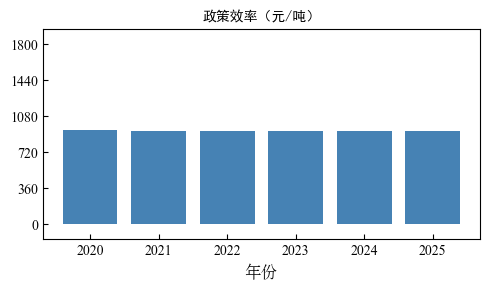

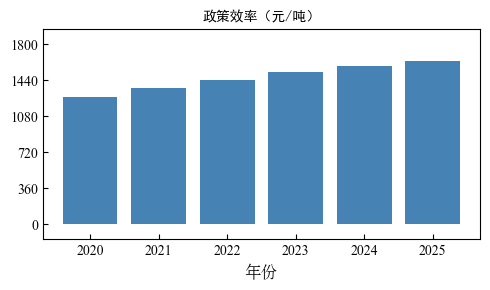

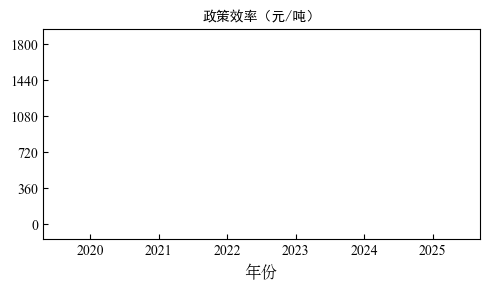

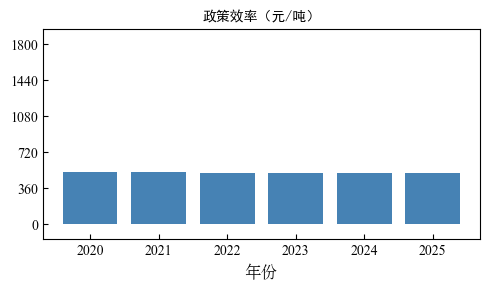

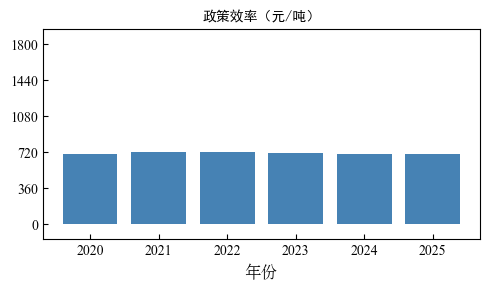

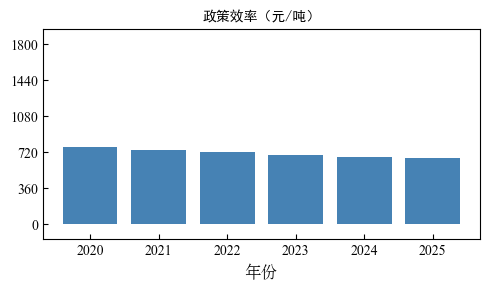

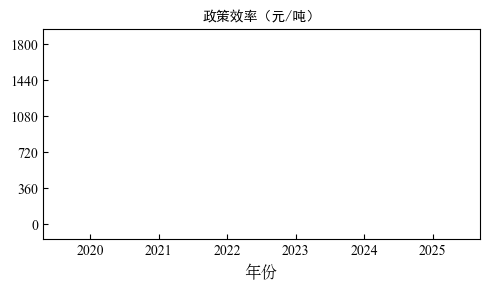

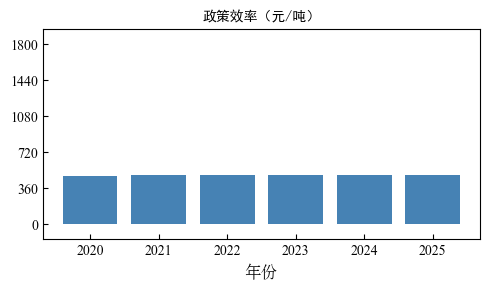

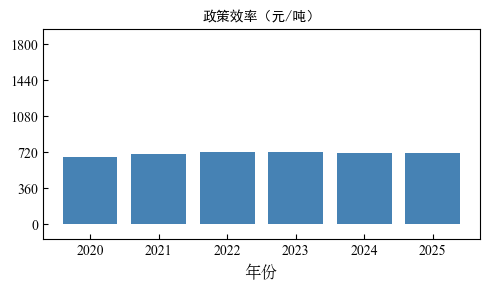

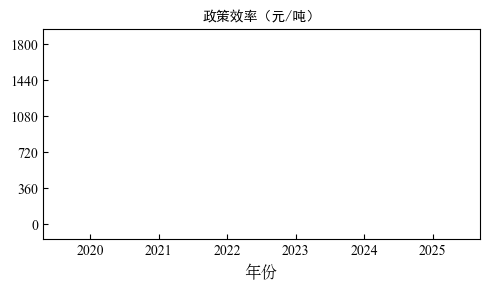

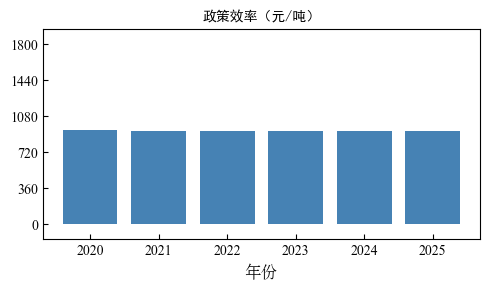

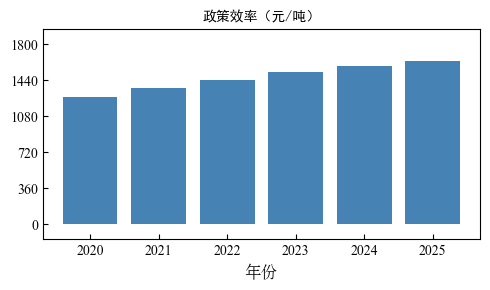

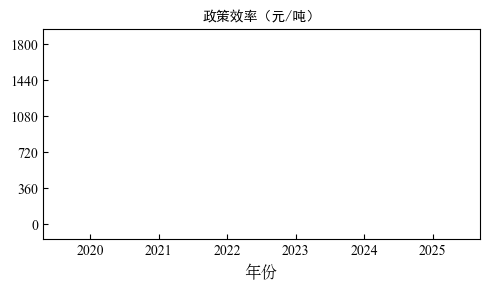

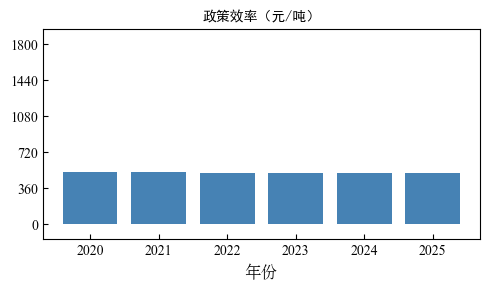

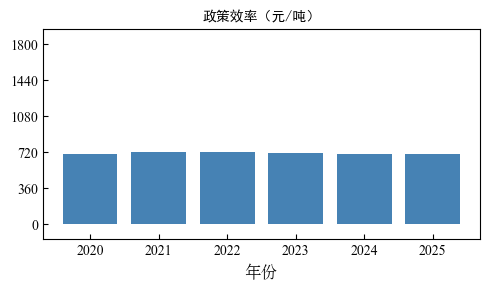

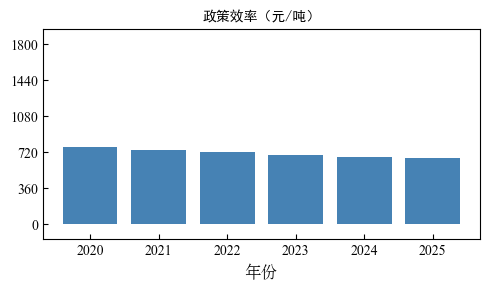

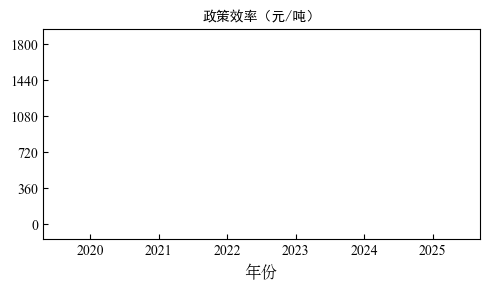

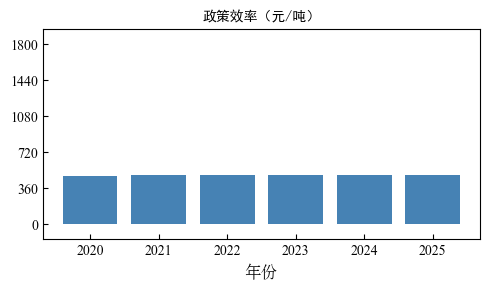

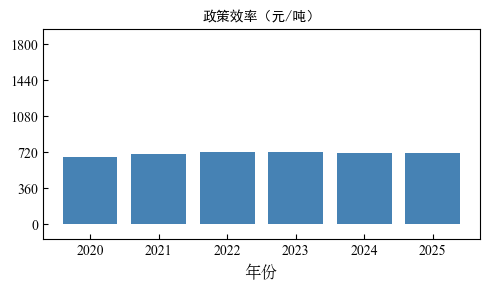

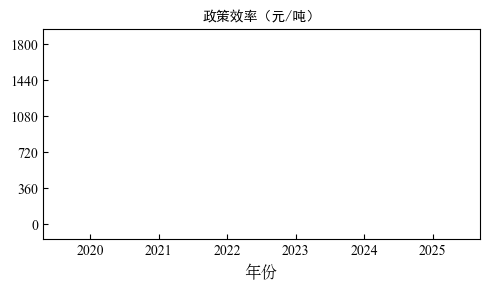

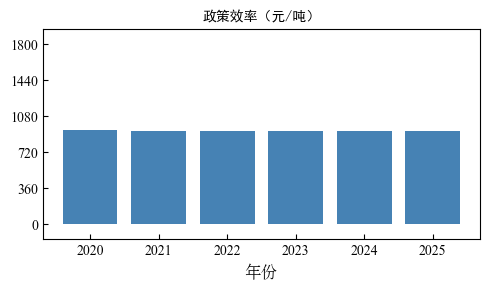

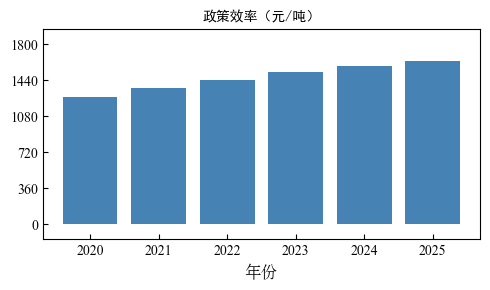

In [7]:
policy_scenarios = ['BASE', 'C_2', 'C_3', 'C_4', 'D_20%', 'D_30%', 'D_40%', 'S_40%', 'S_50%', 'S_60%']
pattern_scenarios = ['BASE', 'DX', 'DY', 'DM']
yticks = np.linspace(0, 1800, 6)
for pattern in pattern_scenarios:
    for scenario in policy_scenarios:
        plt.figure(figsize = (5, 3))
        plt.bar(xticks, policy_carbon[scenario], color = '#4682B4')
        plt.xlabel('年份', fontsize = 12, fontproperties = chinese_font)
        # plt.ylabel('政策效率（元/吨）', fontsize = 12, fontproperties = chinese_font)
        plt.xticks(xticks, fontproperties = english_font)
        plt.yticks(yticks, fontproperties = english_font)
        plt.ylim(-150, 1950)
        plt.title('政策效率（元/吨）', fontsize = 14, fontproperties = 'SimHei')
        plt.gca().tick_params(axis = 'x', direction = 'in')
        plt.gca().tick_params(axis = 'y', direction = 'in')
        plt.tight_layout()
        plt.savefig(f'./images/efficiency_{pattern}_{scenario}.png', dpi = 500, transparent = True)
        plt.show()

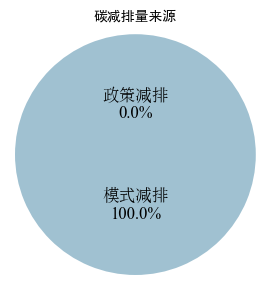

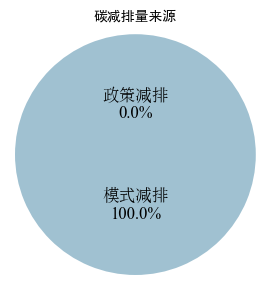

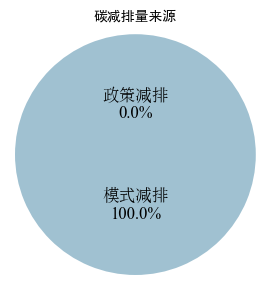

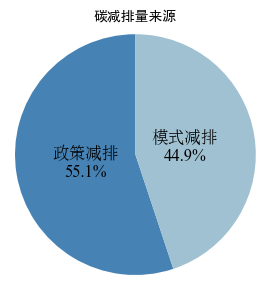

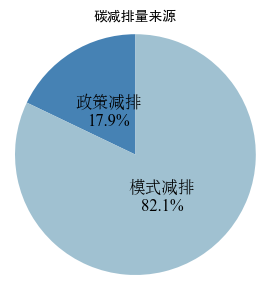

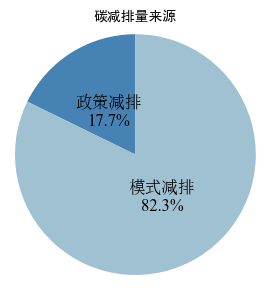

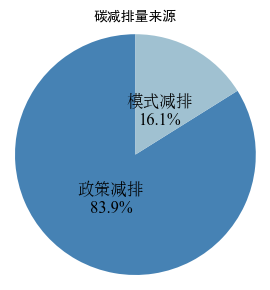

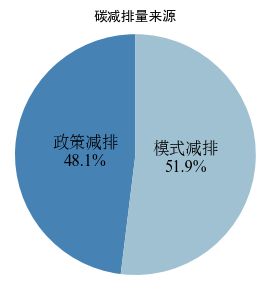

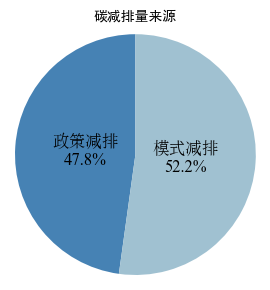

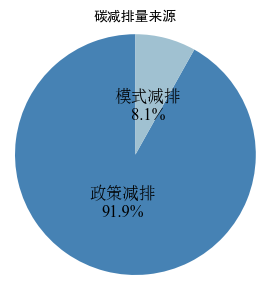

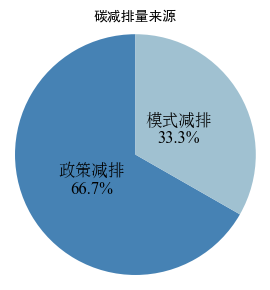

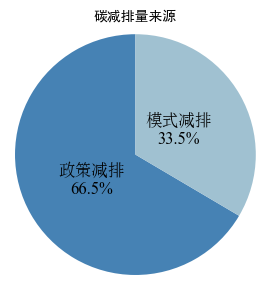

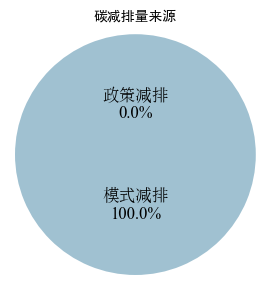

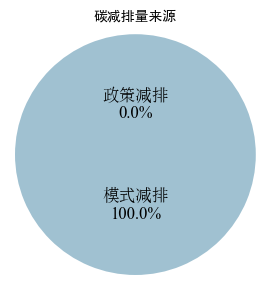

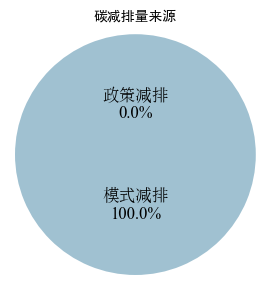

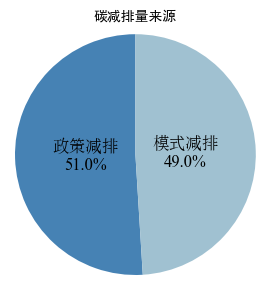

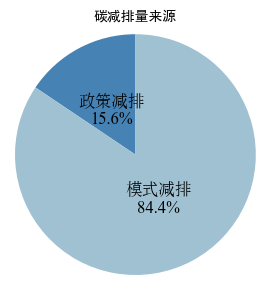

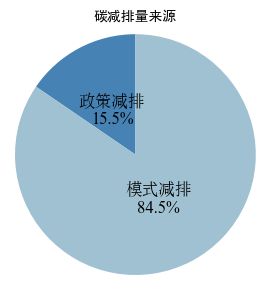

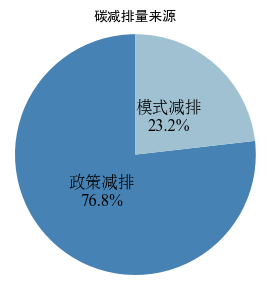

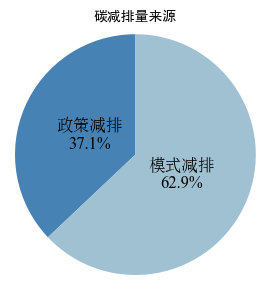

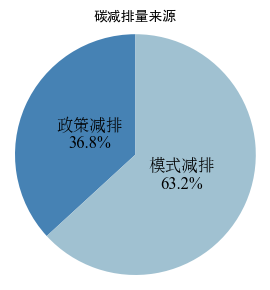

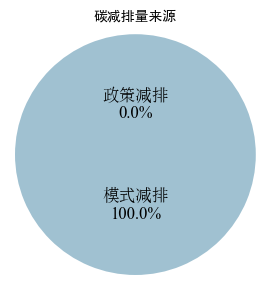

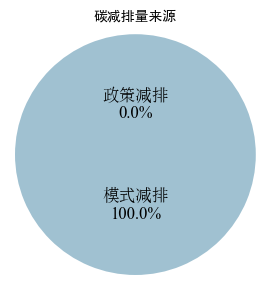

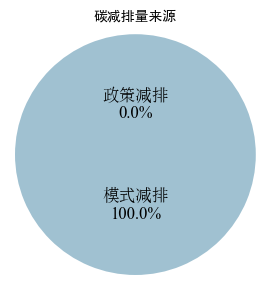

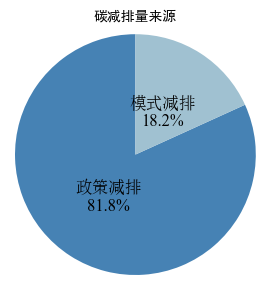

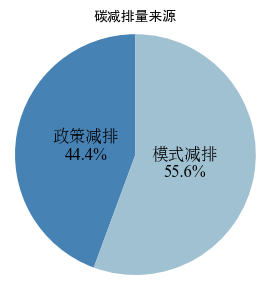

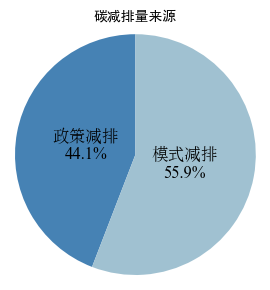

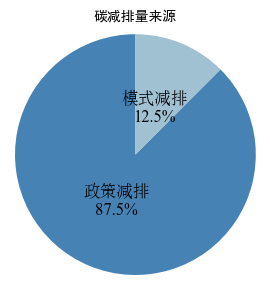

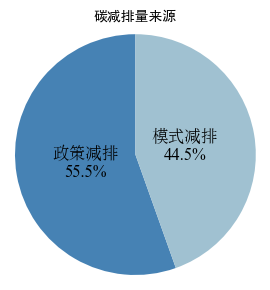

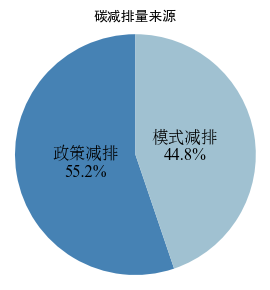

In [9]:
policy_scenarios = ['BASE', 'C_2', 'C_3', 'C_4', 'D_20%', 'D_30%', 'D_40%', 'S_40%', 'S_50%', 'S_60%']
pattern_scenarios = ['DX', 'DY', 'DM']
for scenario in policy_scenarios:
    for pattern in pattern_scenarios:
        data = [sum(policy_reduction[scenario]), sum(pattern_reduction[pattern])]
        total = sum(data)
        percentages = [value / total * 100 for value in data]
        labels = ['政策减排', '模式减排']
        colors = ['#4682B4', '#A0C1D1']
        plt.figure(figsize = (5, 3))
        wedges, texts = plt.pie(
            data,
            labels = ['', ''],  
            colors = ['#4682B4', '#A0C1D1'],
            autopct = None,
            textprops = {'fontsize': 12, 'fontweight': 'bold'},
            labeldistance = 0.4,
            pctdistance = 0.6,
            startangle = 90,
            radius = 1.2)
        for i, wedge in enumerate(wedges):
            angle = (wedge.theta2 + wedge.theta1) / 2
            x = 0.5 * np.cos(np.radians(angle))
            y = 0.5 * np.sin(np.radians(angle))
            label_text = labels[i]
            plt.text(
                x, y + 0.1,
                label_text,
                ha = 'center', va = 'center',
                fontsize = 12,
                fontweight = 'bold',
                fontproperties = chinese_font
            )
            percentage_text = f'{percentages[i]:.1f}%'
            plt.text(
                x, y - 0.1,
                percentage_text,
                ha = 'center', va = 'center',
                fontsize = 12,
                fontweight = 'bold',
                fontproperties = english_font
            )
        plt.title('碳减排量来源', fontsize = 14, fontproperties = 'SimHei')
        plt.tight_layout()
        plt.savefig(f'./images/ratio_{pattern}_{scenario}.png', dpi = 500, transparent = True)
        plt.show()

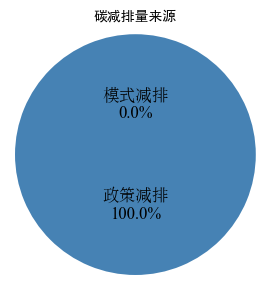

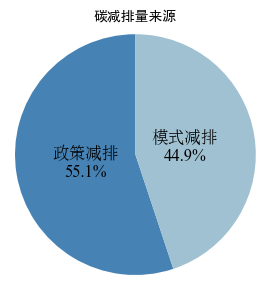

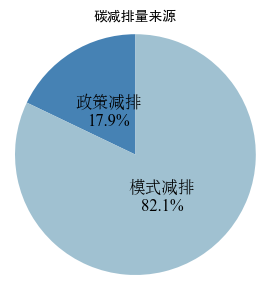

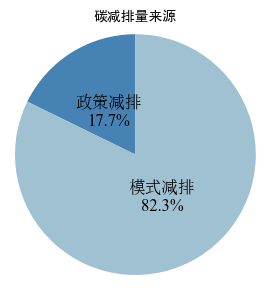

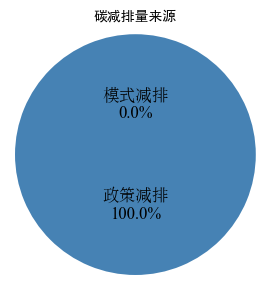

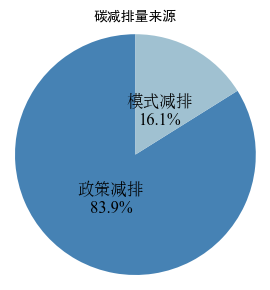

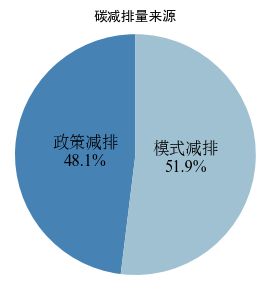

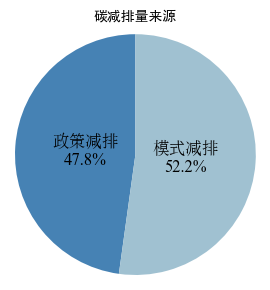

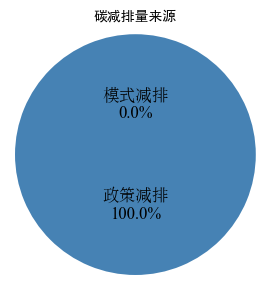

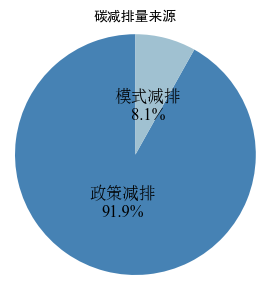

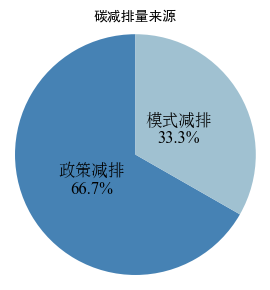

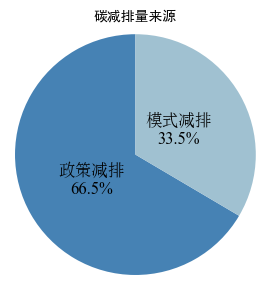

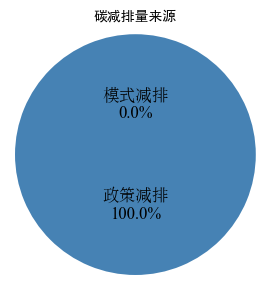

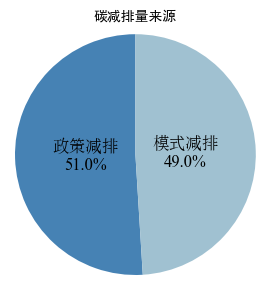

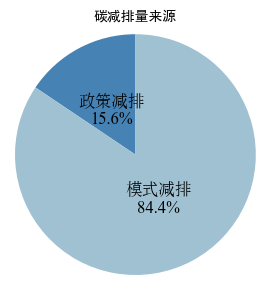

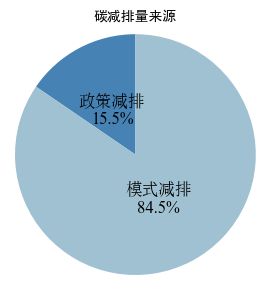

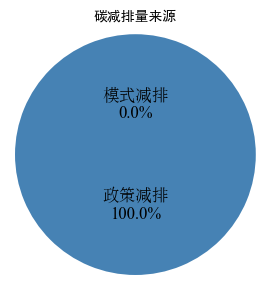

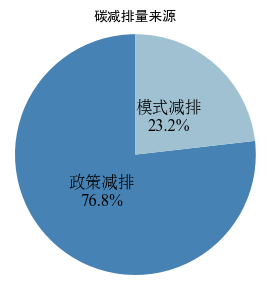

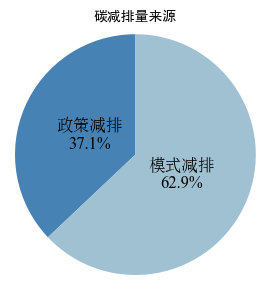

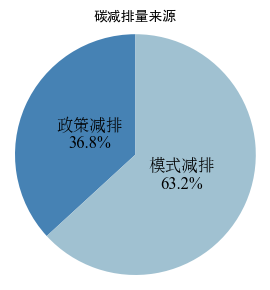

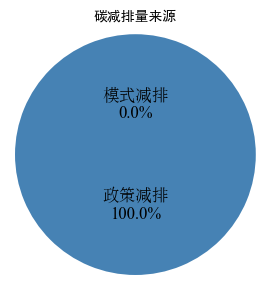

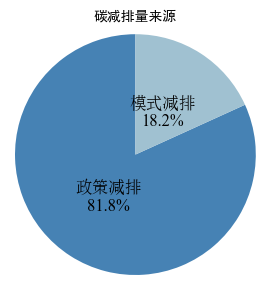

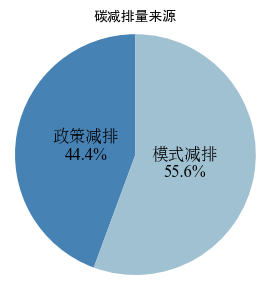

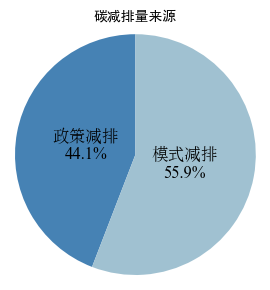

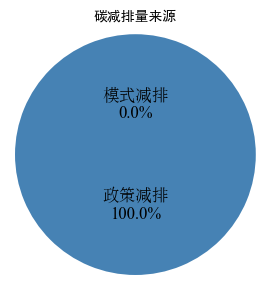

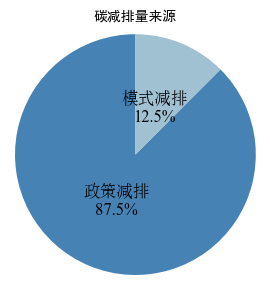

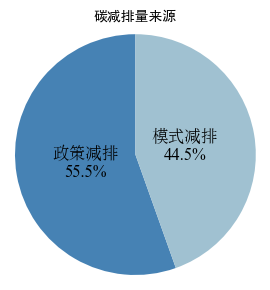

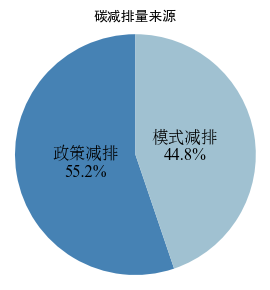

In [10]:
policy_scenarios = ['C_2', 'C_3', 'C_4', 'D_30%', 'D_40%', 'S_50%', 'S_60%']
pattern_scenarios = ['BASE', 'DX', 'DY', 'DM']
for scenario in policy_scenarios:
    for pattern in pattern_scenarios:
        data = [sum(policy_reduction[scenario]), sum(pattern_reduction[pattern])]
        total = sum(data)
        percentages = [value / total * 100 for value in data]
        labels = ['政策减排', '模式减排']
        colors = ['#4682B4', '#A0C1D1']
        plt.figure(figsize = (5, 3))
        wedges, texts = plt.pie(
            data,
            labels = ['', ''],  
            colors = ['#4682B4', '#A0C1D1'],
            autopct = None,
            textprops = {'fontsize': 12, 'fontweight': 'bold'},
            labeldistance = 0.4,
            pctdistance = 0.6,
            startangle = 90,
            radius = 1.2)
        for i, wedge in enumerate(wedges):
            angle = (wedge.theta2 + wedge.theta1) / 2
            x = 0.5 * np.cos(np.radians(angle))
            y = 0.5 * np.sin(np.radians(angle))
            label_text = labels[i]
            plt.text(
                x, y + 0.1,
                label_text,
                ha = 'center', va = 'center',
                fontsize = 12,
                fontweight = 'bold',
                fontproperties = chinese_font
            )
            percentage_text = f'{percentages[i]:.1f}%'
            plt.text(
                x, y - 0.1,
                percentage_text,
                ha = 'center', va = 'center',
                fontsize = 12,
                fontweight = 'bold',
                fontproperties = english_font
            )
        plt.title('碳减排量来源', fontsize = 14, fontproperties = 'SimHei')
        plt.tight_layout()
        plt.savefig(f'./images/ratio_{pattern}_{scenario}.png', dpi = 500, transparent = True)
        plt.show()